In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-10 22:36:55,290 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-10 22:36:55,292 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-06-10 22:36:55,294 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-10 22:36:55,296 -INFO - dataset_builder:dataset_builder.py:207 - dataset package is loaded...
2021-06-10 22:36:55,881 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = '--'
WAIT_TIME_SECONDS = 7
# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# WAIT_TIME_SECONDS = 7
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
decoder_dict

{0: 'button',
 1: 'link',
 2: 'textfield',
 3: 'dropdown',
 4: 'checkbox',
 5: 'radiobutton',
 6: 'textarea',
 7: 'fileinput',
 8: 'iframe',
 9: 'range',
 10: 'progressbar',
 11: 'datetimeselector',
 12: 'colorpicker',
 13: 'numberselector',
 14: 'selector',
 15: 'table',
 16: 'slider-toggle',
 17: 'slider',
 18: 'tree-node',
 19: 'steper',
 20: 'tab',
 21: 'n/a'}

# Generate dataset

In [6]:
DATASET_NAME = 'ms-office'

In [7]:
# class JDIDatasetBuilder(DatasetBuilder):

#     def setUp(self, driver):
#         self.logger.info(f'getting page')
#         driver.set_window_size(width=1920, height=1090)
#         driver.get(SITE_URL)
        
# #         driver.find_element_by_id("user-icon").click()
# #         driver.find_element_by_id("name").send_keys(LOGIN)
# #         driver.find_element_by_id("password").send_keys(PASSWORD)
# #         driver.find_element_by_id("login-button").click()
#         sleep(WAIT_TIME_SECONDS)
        
# #         driver.find_element_by_link_text("Service").click()
# #         driver.find_element_by_link_text("Complex Table").click()
#         maximize_window(driver=driver)
        

# with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
#     elements_df = builder.dataset
#     plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))

In [8]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [9]:
df = build_features(df)

2021-06-10 22:36:56,258 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [10]:
elements_dict = build_elements_dict(df)

In [11]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,2330012630027540955724739246,None,None,None,True,0,0.0,0.0,1886.0,3076.0
1,HEAD,9516711656027540955429792302,2330012630027540955724739246,None,6877468795027540950931596033,False,0,0.0,0.0,0.0,0.0
2,STYLE,8554082672027540954882580251,9516711656027540955429792302,None,2312274711027540951540084335,False,0,0.0,0.0,0.0,0.0
3,STYLE,2312274711027540951540084335,9516711656027540955429792302,8554082672027540954882580251,3228394160027540955263699232,False,0,0.0,0.0,0.0,0.0
4,META,3228394160027540955263699232,9516711656027540955429792302,2312274711027540951540084335,6733724437027540958583211829,False,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
734,SCRIPT,0980252087027540966562786108,6877468795027540950931596033,6468167505027540966888748461,3114311688027540962129015704,False,1,0.0,0.0,0.0,0.0
735,SCRIPT,3114311688027540962129015704,6877468795027540950931596033,0980252087027540966562786108,7843122118027540960550045894,False,1,0.0,0.0,0.0,0.0
736,SCRIPT,7843122118027540960550045894,6877468795027540950931596033,3114311688027540962129015704,3498172309027540968033974888,False,1,0.0,0.0,0.0,0.0
737,SCRIPT,3498172309027540968033974888,6877468795027540950931596033,7843122118027540960550045894,9914144770027540967181794083,False,1,0.0,0.0,0.0,0.0


In [12]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [13]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-10 22:36:56,938 -INFO - common:common.py:491 - Num radio buttons found: 0
2021-06-10 22:36:56,940 -INFO - common:common.py:495 - Num radio2 buttons found: 0
2021-06-10 22:36:56,942 -INFO - common:common.py:502 - Num checkboxes found: 0
2021-06-10 22:36:56,945 -INFO - common:common.py:509 - Num comboboxes/dropdowns found: 0
2021-06-10 22:36:56,947 -INFO - common:common.py:520 - Num textfields found: 2
2021-06-10 22:36:56,950 -INFO - common:common.py:525 - Num texfields for numbers found: 0
2021-06-10 22:36:56,953 -INFO - common:common.py:530 - Num ranges found: 0
2021-06-10 22:36:56,955 -INFO - common:common.py:535 - Num ordinary text inputs found: 0
2021-06-10 22:36:56,957 -INFO - common:common.py:538 - Num buttons found: 17
2021-06-10 22:36:56,960 -INFO - common:common.py:543 - Num buttons1 found: 0
2021-06-10 22:36:56,963 -INFO - common:common.py:548 - Num buttons2 (Material-UI) found: 0
2021-06-10 22:36:56,965 -INFO - common:common.py:553 - Num links found: 197
(121, 8)


In [14]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for _, r in predictions_df.iterrows():
    
#     patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(r.x, r.y, 
#              decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

# Generate and Save Labels

In [15]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [16]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [17]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,0,0.907514,0.016092,0.022070,0.014629,"(1705, 26, 41, 44)"
1,0,0.783762,0.043726,0.059380,0.016580,"(1434, 109, 113, 51)"
2,0,0.834997,0.043401,0.040988,0.014629,"(1549, 111, 78, 44)"
3,0,0.678665,0.134428,0.025749,0.016580,"(1266, 388, 49, 51)"
4,1,0.830531,0.015930,0.085654,0.013004,"(1499, 29, 162, 40)"


In [18]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for i, r in boxes_df.iterrows():
#     x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
#     patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(x, y, 
#              f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

In [19]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [20]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-10 22:36:57,167 -INFO - labels:labels.py:44 - Assign labels from annotation file: dataset/annotations/ms-office.txt
2021-06-10 22:36:57,168 -WARNING - labels:labels.py:54 - Image's (width,height) are taken from image file: dataset/images/ms-office.png
2021-06-10 22:36:57,295 -WARNING - labels:labels.py:60 - Use cache file: dataset/cache-labels/ms-office.pkl
2021-06-10 22:36:57,323 -INFO - labels:labels.py:63 - 739 rows were read from dataset/cache-labels/ms-office.pkl


In [21]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [22]:
df.label.value_counts()

21    616
1     117
0       5
2       1
Name: label, dtype: int64

1903 3076


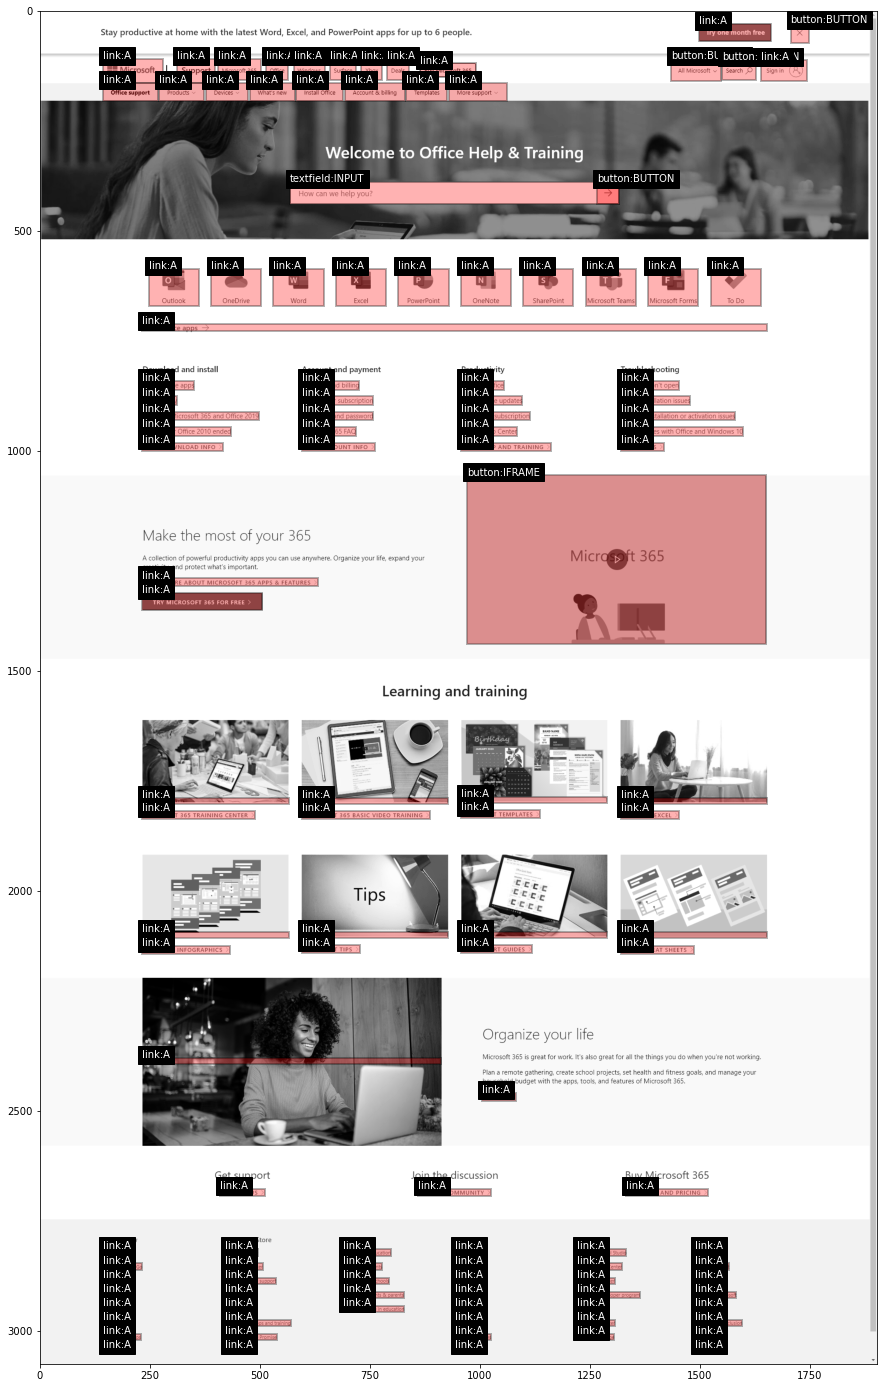

In [23]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 300))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name, # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
